In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
DT = pd.read_csv('C://Users//Akshay//Downloads//delivery_time.csv')

In [4]:
DT

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
DT.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
#making the data types same
DT['Sorting Time'] = DT['Sorting Time'].astype('float64')

In [7]:
DT

,Delivery Time,Sorting Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [8]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [9]:
#checking for any missing values
DT.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

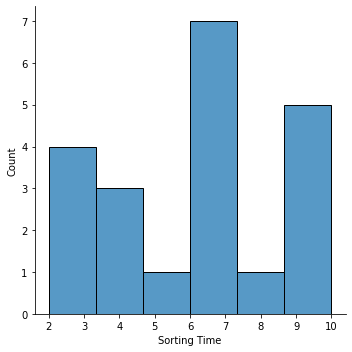

In [10]:
sns.displot(DT['Sorting Time'])

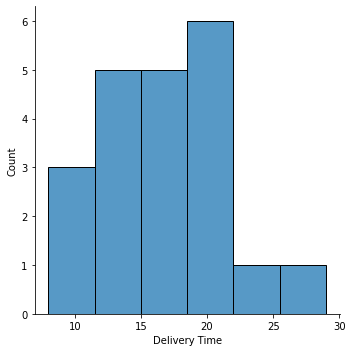

In [11]:
sns.displot(DT['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

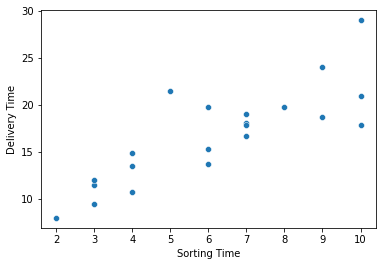

In [12]:
#Checking relation between dependant and independant variables
# Sorting Time is the independant variable while Delivery Time is the dependant variable
sns.scatterplot(x = 'Sorting Time' , y = 'Delivery Time' , data = DT)

In [13]:
# Renaming the columns to make it shorter for the ease of making the model

In [14]:
DT = DT.rename({'Delivery Time':'DelTime'} , axis =1)

In [15]:
DT = DT.rename({'Sorting Time':'SortTime'} , axis =1)

In [16]:
DT

,DelTime,SortTime
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [17]:
DT.corr()

,DelTime,SortTime
DelTime,1.000000,0.825997
SortTime,0.825997,1.000000


In [18]:
# Making the model

Model 1

In [19]:
model = smf.ols("DelTime~SortTime" , data = DT).fit()

<AxesSubplot:xlabel='SortTime', ylabel='DelTime'>

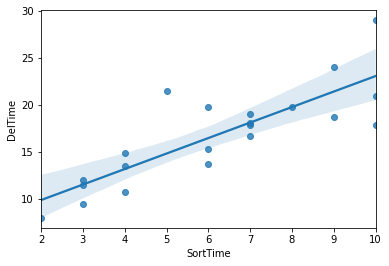

In [20]:
sns.regplot(x = 'SortTime' , y = 'DelTime' , data = DT)

In [21]:
# Testing the model

In [22]:
model.rsquared

0.6822714748417231

In [23]:
model.params

Intercept    6.582734
SortTime     1.649020
dtype: float64

In [24]:
model.pvalues

Intercept    0.001147
SortTime     0.000004
dtype: float64

In [25]:
# Predicted values
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [26]:
DT['Predicted'] = model.fittedvalues

In [27]:
DT

,DelTime,SortTime,Predicted
0,21.00,10.0,23.072933
1,13.50,4.0,13.178814
2,19.75,6.0,16.476853
3,24.00,9.0,21.423913
4,29.00,10.0,23.072933
5,15.35,6.0,16.476853
6,19.00,7.0,18.125873
7,9.50,3.0,11.529794
8,17.90,10.0,23.072933
9,18.75,9.0,21.423913


In [28]:
Error = DT['Predicted']-DT['DelTime']

In [29]:
DT['Error'] = Error

In [30]:
DT

,DelTime,SortTime,Predicted,Error
0,21.00,10.0,23.072933,2.072933
1,13.50,4.0,13.178814,-0.321186
2,19.75,6.0,16.476853,-3.273147
3,24.00,9.0,21.423913,-2.576087
4,29.00,10.0,23.072933,-5.927067
5,15.35,6.0,16.476853,1.126853
6,19.00,7.0,18.125873,-0.874127
7,9.50,3.0,11.529794,2.029794
8,17.90,10.0,23.072933,5.172933
9,18.75,9.0,21.423913,2.673913


In [31]:
# model transformations

Model 2

In [32]:
sqx = np.sqrt(DT['SortTime'])

In [33]:
sqx

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: SortTime, dtype: float64

In [34]:
model = smf.ols("DelTime~sqx" , data = DT).fit()

In [35]:
model.rsquared

0.695806227630867

Model 3

In [36]:
sq_y = np.sqrt(DT['DelTime'])

In [37]:
sq_y

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: DelTime, dtype: float64

In [38]:
model = smf.ols("sq_y~SortTime" , data = DT).fit()

In [39]:
model.rsquared

0.704049871541756

Model 4

In [44]:
log_x = np.log(DT['SortTime'])

In [45]:
log_x

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: SortTime, dtype: float64

In [46]:
model = smf.ols("DelTime~log_x" , data = DT).fit()

In [47]:
model.rsquared

0.6954434611324223

Model 5

In [48]:
log_y = np.log(DT['DelTime'])

In [49]:
log_y

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: DelTime, dtype: float64

In [50]:
model = smf.ols("log_y~SortTime" , data = DT).fit()

In [51]:
model.rsquared

0.7109478980584187

Model 6

In [52]:
model = smf.ols("log_y~log_x" , data = DT).fit()

In [53]:
model.rsquared

0.77216134926874

Model 7

In [55]:
r_x = np.reciprocal(DT['SortTime'])

In [56]:
r_x

0     0.100000
1     0.250000
2     0.166667
3     0.111111
4     0.100000
5     0.166667
6     0.142857
7     0.333333
8     0.100000
9     0.111111
10    0.125000
11    0.250000
12    0.142857
13    0.333333
14    0.333333
15    0.250000
16    0.166667
17    0.142857
18    0.500000
19    0.142857
20    0.200000
Name: SortTime, dtype: float64

In [57]:
r_y = np.reciprocal(DT['DelTime'])

In [58]:
r_y

0     0.047619
1     0.074074
2     0.050633
3     0.041667
4     0.034483
5     0.065147
6     0.052632
7     0.105263
8     0.055866
9     0.053333
10    0.050429
11    0.093023
12    0.059952
13    0.086957
14    0.083126
15    0.067204
16    0.072727
17    0.055218
18    0.125000
19    0.056085
20    0.046512
Name: DelTime, dtype: float64

In [59]:
model = smf.ols("r_y~r_x" , data = DT).fit()

In [60]:
model.rsquared

0.8354583624350859

# Concluding that model 7 is the best model as it gives highest R squared value